In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

<b>Problem Statement:</b> A bank manager is troubled with customers quitting on credit card services. To solve this issue they need to predict who are most likely to quit so that they can be proactively provided with better services and have their decisions changed.

<b>Project Aim</b>

1. Making a model to find Probability of a person to churn

2. Identifying the causes of a person churning. Which further helps bank in making proper improvements and offers for that person

<b> Why probability ?</b>

* It helps bank in better decision making and providing with better retention strategies.
* Probabaility of churn provides with better insights into how likely is it fo a customer to churn.

<b> Benefits of Project</b>
* Improved Customer Experience
* Improved Customer Retention
* Revenue Protection
* Well Targeted Marketing
* Reduced Marketing costs
* Better designing of marketing Plan

In [2]:
df = pd.read_csv('../data/BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<b>1. CLIENTNUM --</b> Unique User ID -- Categorical nominal  

<b>2. Attrition_Flag --</b> has person churned or not, Attrited if churned -- Categorical nominal

<b>3. Customer_Age --</b> age of person in years -- Numeric Discrete

<b>4. Gender --</b> M if Male, F if female -- Categorical Nominal

<b>5. Dependent_Count --</b> Number of dependents on the person -- Numeric Discrete

<b>6. Education_Level --</b> Level of eduction of person(like High School, Graduate & etc.) -- Education Level of few people is unknown -- Categorical ordinal

<b>7. Marital_Status --</b> Married/Single/Divorced status of person -- Marital status of few people is unknown -- Categorical nominal

<b>8. Income_Category --</b> Income group for 0-40K to 120k+ , 6 categories -- income category of few people is unknown -- Categorical Ordinal

<b>9. Card_Category --</b> The type of card out of 4 offered to a person -- Catgorical Nominal

<b>10. Months_on_book --</b> Duration in months since person has card -- Numeric Discrete

<b>11. Total_Relationship_Count --</b> No. of products of bank being used by person -- Numeric Discrete

<b>12. Months_Inactive_12_mon --</b> No. of months inactive in last 12 months  -- Numeric Discrete

<b>13. Contacts_Count_12_mon --</b> No. of contacts made with bank in past 12 months -- Numeric Discrete

<b>14. Credit_Limit --</b> Credit Limit of Credit Card --  Numeric Continuous

<b>15. Total_Revolving_Bal --</b> Total_Revolving_Bal is a numerical value indicating the amount of unpaid credit card balance that is being "revolved" to the next billing cycle. -- Numeric Continuous

<b>16. Avg_Open_To_Buy --</b> Average amount of money left to be used out of credit limit -- Numeric Continuous

<b>17. Total_Amt_Chng_Q4_Q1 --</b> Ratio of amount spent between Q4 to Q1 -- Numeric Continuous

<b>18. Total_Trans_Amt --</b> Total amount spent on credit card over Lifetime -- Numeric Continuous

<b>19. Total_Trans_Ct --</b> Total number of transanction done on credit card over Lifetime -- Numeric Continuous

<b>20. Total_Ct_Chng_Q4_Q1 --</b> Ratio of number of Transanctions done Q4 to Q1 -- Numeric Continuous

<b>21. Avg_Utilization_Ratio --</b> Average Card Utilization Ratio -- Numeric Continuous

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.shape

(10127, 20)

In [7]:
df1 = df.copy()

In [8]:
target = 'Attrition_Flag'
Categoricals = ['Gender','Education_Level','Marital_Status',
                'Income_Category','Card_Category']
Numeric_Continuous = ['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Revolving_Bal', 
                    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Credit_Limit']
Numeric_Discrete = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count'
                    ,'Months_Inactive_12_mon','Contacts_Count_12_mon']
len(Categoricals) + len(Numeric_Discrete) + len(Numeric_Continuous)

19

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
df1.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [12]:
def analysis_plots(df, columns, columns_type, hue=None, figsize=(15, 5), ncols=3, Normalize=False, target_col=None):
    """
    Plots value counts for each column in columns, grouped by columns_type.
    - df: pandas DataFrame
    - columns: list of column names to plot
    - columns_type: 'Categorical', 'Numeric_Discrete', or 'Numeric_Continuous'
    - hue: optional, column name for hue (grouping)
    - figsize: tuple, size of the figure
    - ncols: int, number of plots per row
    - Normalize: bool, normalize value counts for categoricals
    - target_col: str, optional, if given, plot by target_col (binary)
    """
    n = len(columns)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize[0], figsize[1]*nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(columns):
        ax = axes[i]
        if columns_type == 'Categorical':
            if target_col:
                vc = df.groupby([col, df[target_col]])[col].count().unstack().fillna(0)
                vc.plot(kind='bar', ax=ax)
                ax.set_title(f'{col} by {target_col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
                ax.legend(title=target_col)
            else:
                df[col].value_counts(normalize=Normalize).plot(kind='bar', ax=ax)
                ax.set_title(f'Value Counts: {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
        elif columns_type in ['Numeric_Discrete', 'Numeric_Continuous']:
            if target_col:
                for val in df[target_col].unique():
                    subset = df[df[target_col] == val][col]
                    sns.kdeplot(subset, ax=ax, label=str(val), fill=True, alpha=0.4)
                ax.set_title(f'{col} KDE by {target_col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Density')
                ax.legend(title=target_col)
            else:
                sns.histplot(df[col], ax=ax, kde=True)
                ax.set_title(f'Distribution: {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
        else:
            ax.set_visible(False)
    # Hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

In [13]:
def corr_heatmap(df,cols):
    '''To plot co-relation coefficient in 2 variable of columns
    to understannd relation in 2 columns'''
    corr = df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix: Numeric Features')
    plt.show()

## Univariate Analysis

### Target Distribution
* Number of attrited customers is much lower than existing customers. Too imbalanced dataset to train model. Need to use some way to adjust for this while trainning model. Dataset is imbalanced. Ratio of non-churned to churned is roughly 4:1.

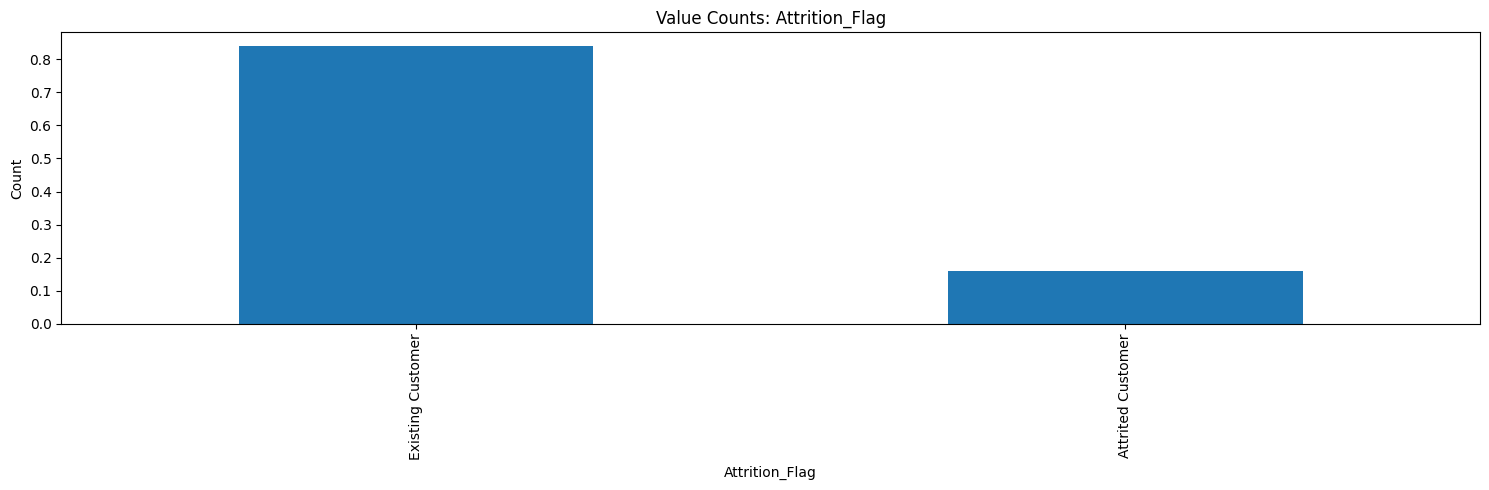

In [14]:
analysis_plots(df1,[target],'Categorical',ncols=1,Normalize=True)

### Categoricals
* Number of females is a bit more than males.
* Most people are in having Blue Card's. Number of people in higher card category is too low.
* Unknown is category in Income Category, Education Level, Maritial status.

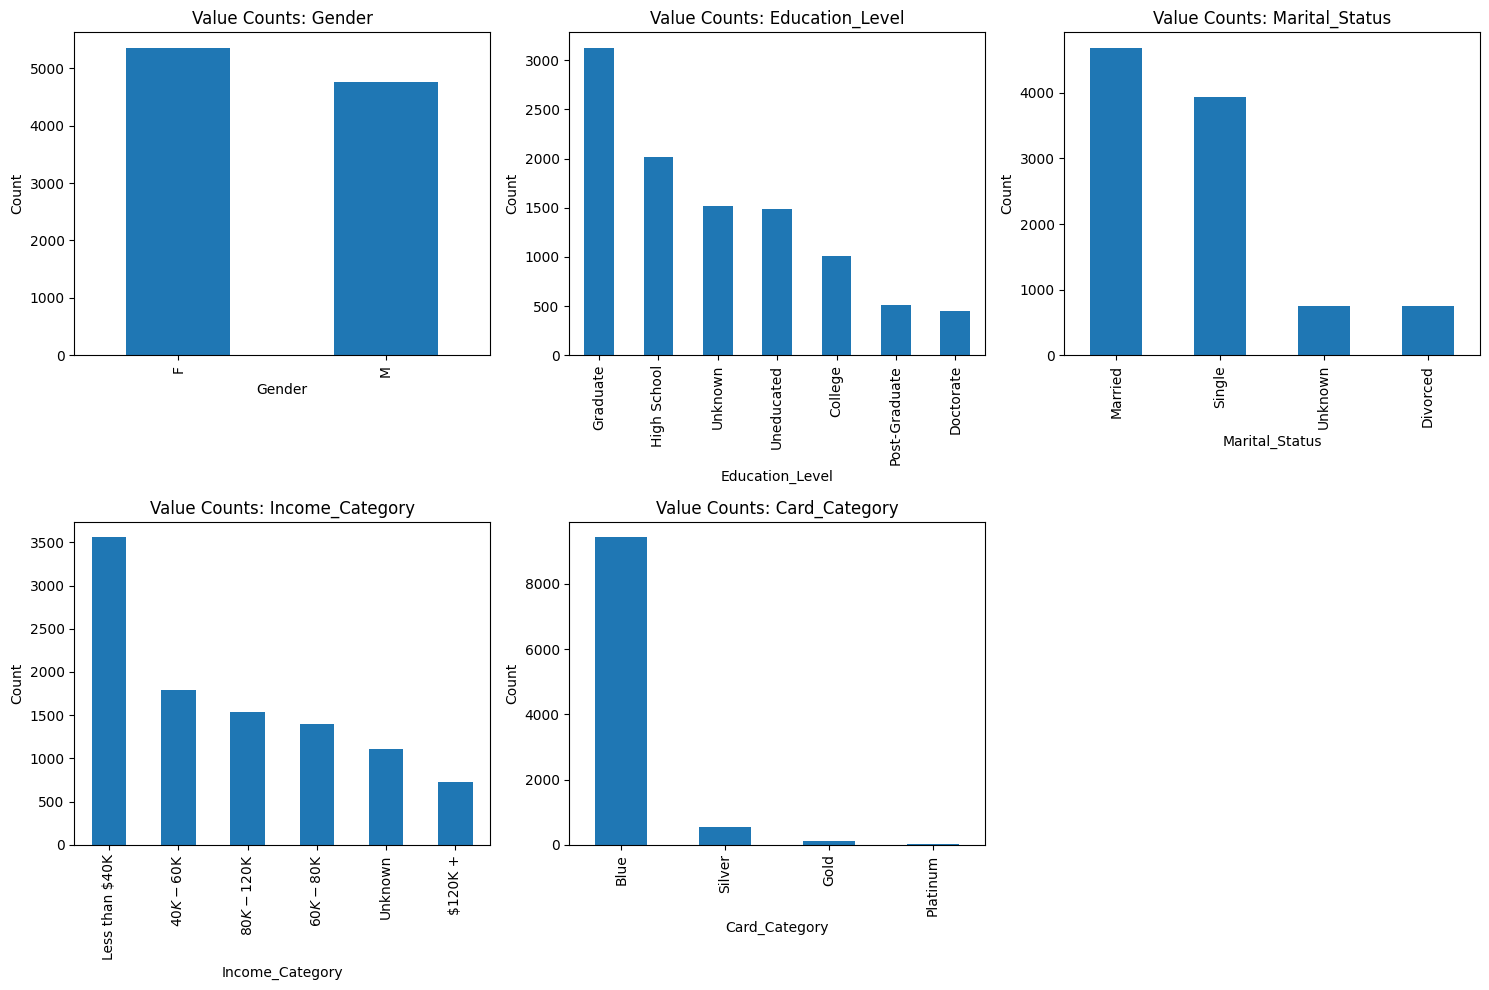

In [15]:
analysis_plots(df1,Categoricals,'Categorical',ncols=3)

### Numeric_Discrete
* Majority of people joined 36 months ago. That's a anomaly is data.
* 80% of customers have atleast 3 relationship with bank
* Median age is 46 yrs. 50% customer's are aged between  41 to 52.

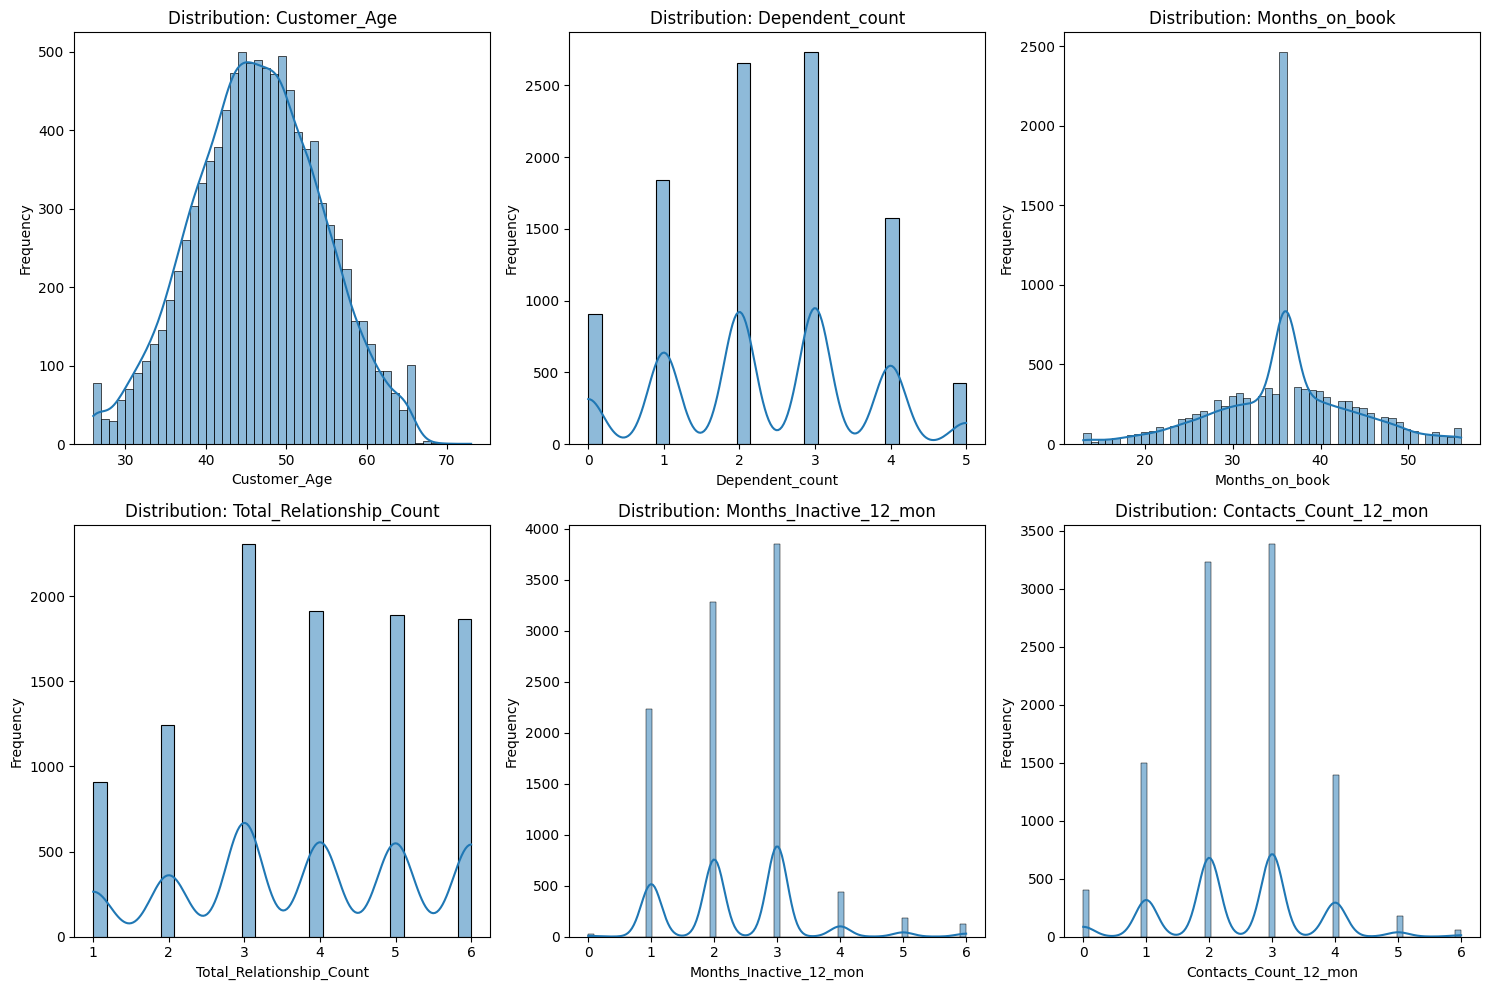

In [16]:
analysis_plots(df1,Numeric_Discrete,'Numeric_Discrete')

### Numeric_Continuous
* Avg. open to buy is really similar to Credit Limit. So keep only one while trainning.
* Credit limit is right skewed due that fact that majority of people have lower level cards. 
* Total Transaction Amt change, Count change Q4 -Q1 is less than one indicating lowering spendings in Q4 relative to Q1. 
* There a 2 clusters in Total Transaction Count indicating a possible divide of churners and non-churners. This could be a strong indication of churn. Will verify this later.
* There are 4 clusters on total transaction amount which is can be grouped up in pais of 2 cluseters similar to total transaction count this could be 2nd major factor affecting churn. Will verify this later.
* Total transaction count and total transaction count is highly positively co-related
* Majority of people have really low revolving balance this could be an indicator of really low usage of card. This might have a strong co-relation to churn.

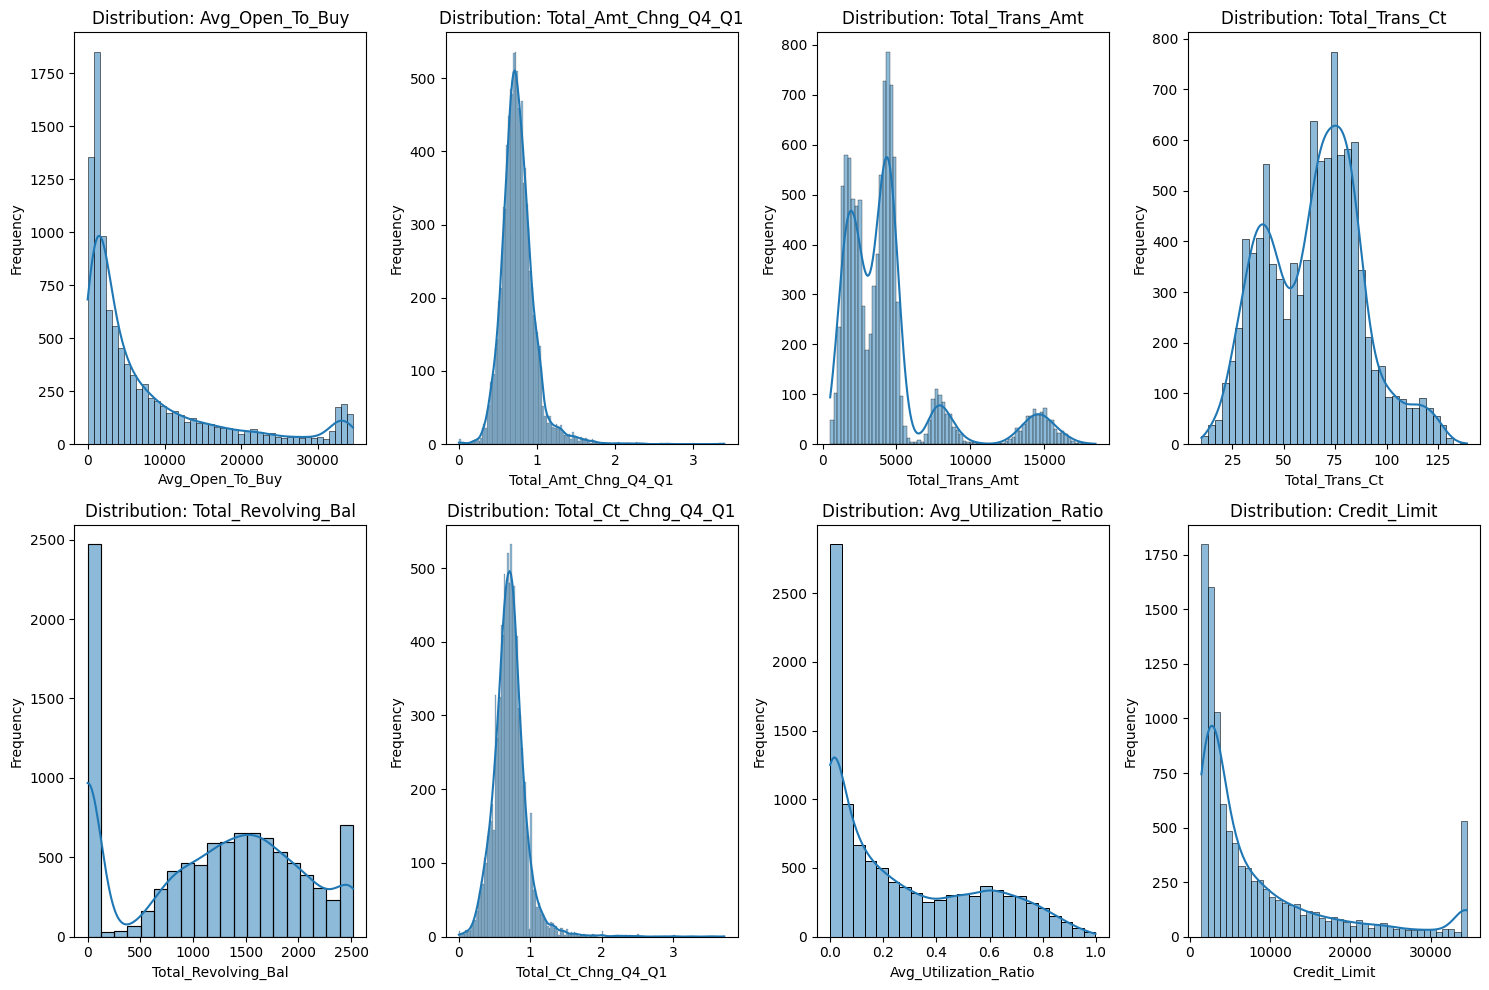

In [17]:
analysis_plots(df1,Numeric_Continuous,'Numeric_Continuous',ncols=4)


## Bivariate Analysis

### Numeric_Discrete x Numeric_Discrete
* Customer age has a strong co-relation with months on book.

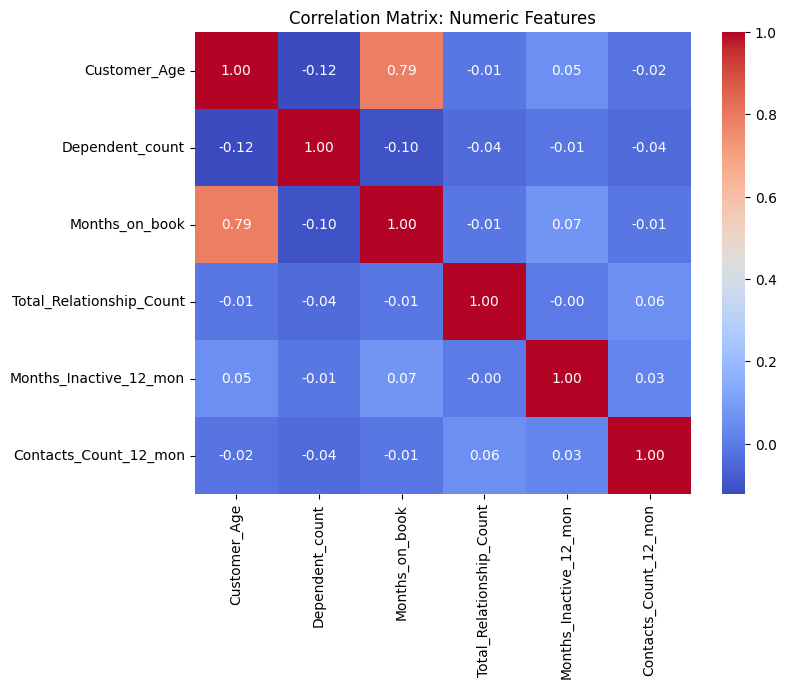

In [18]:
corr_heatmap(df1,Numeric_Discrete)

<Axes: xlabel='Months_on_book', ylabel='Customer_Age'>

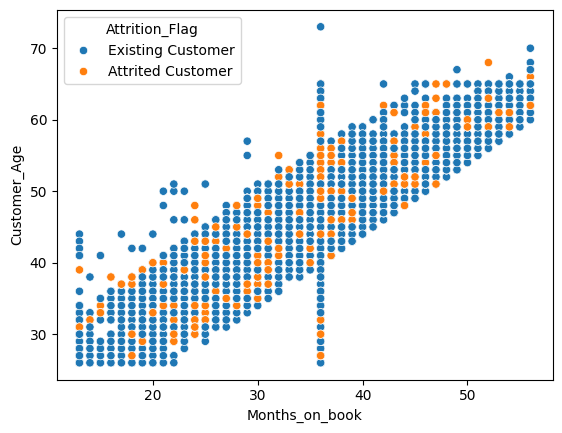

In [19]:
sns.scatterplot(df1,x='Months_on_book',y='Customer_Age',hue='Attrition_Flag')

### Numeric_Continuous x Numeric_Continuous
* Avg. open to buy is really similar to Credit Limit. So keep only one while trainning. Both are perfectly correlated
* Total transaction count and total transaction count is highly positively co-related
* Avg. Utilization Ratio has a strong positive co-relation to Total Revolving Bal.
* Avg. Utilization Ratio has a moderate negative co-relation to Credit limit and in turn to Avg. open to buy.
* Total Transaction Amount Change Q4 Q1 has moderate co-relation to Total Transaction Count Change Q4 Q1

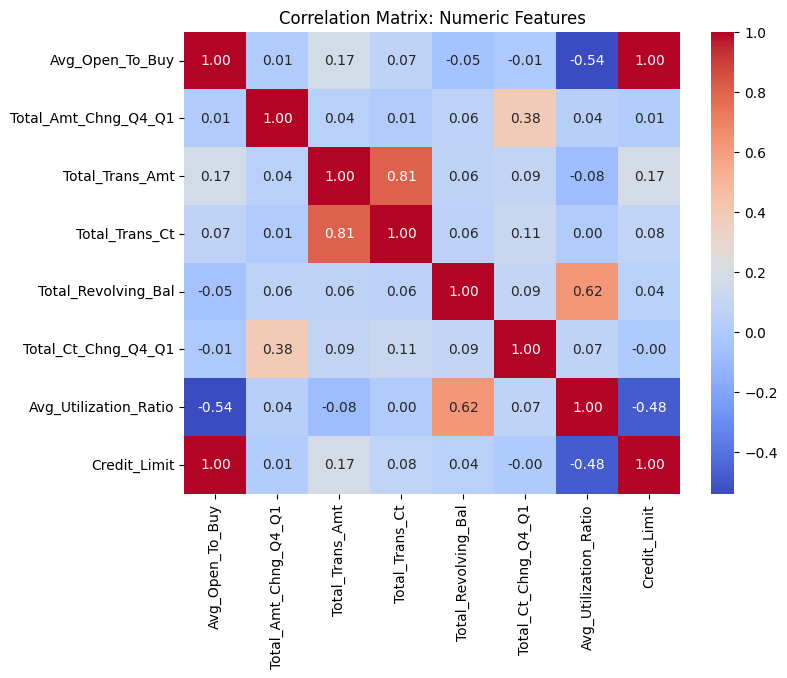

In [20]:
corr_heatmap(df1,Numeric_Continuous)

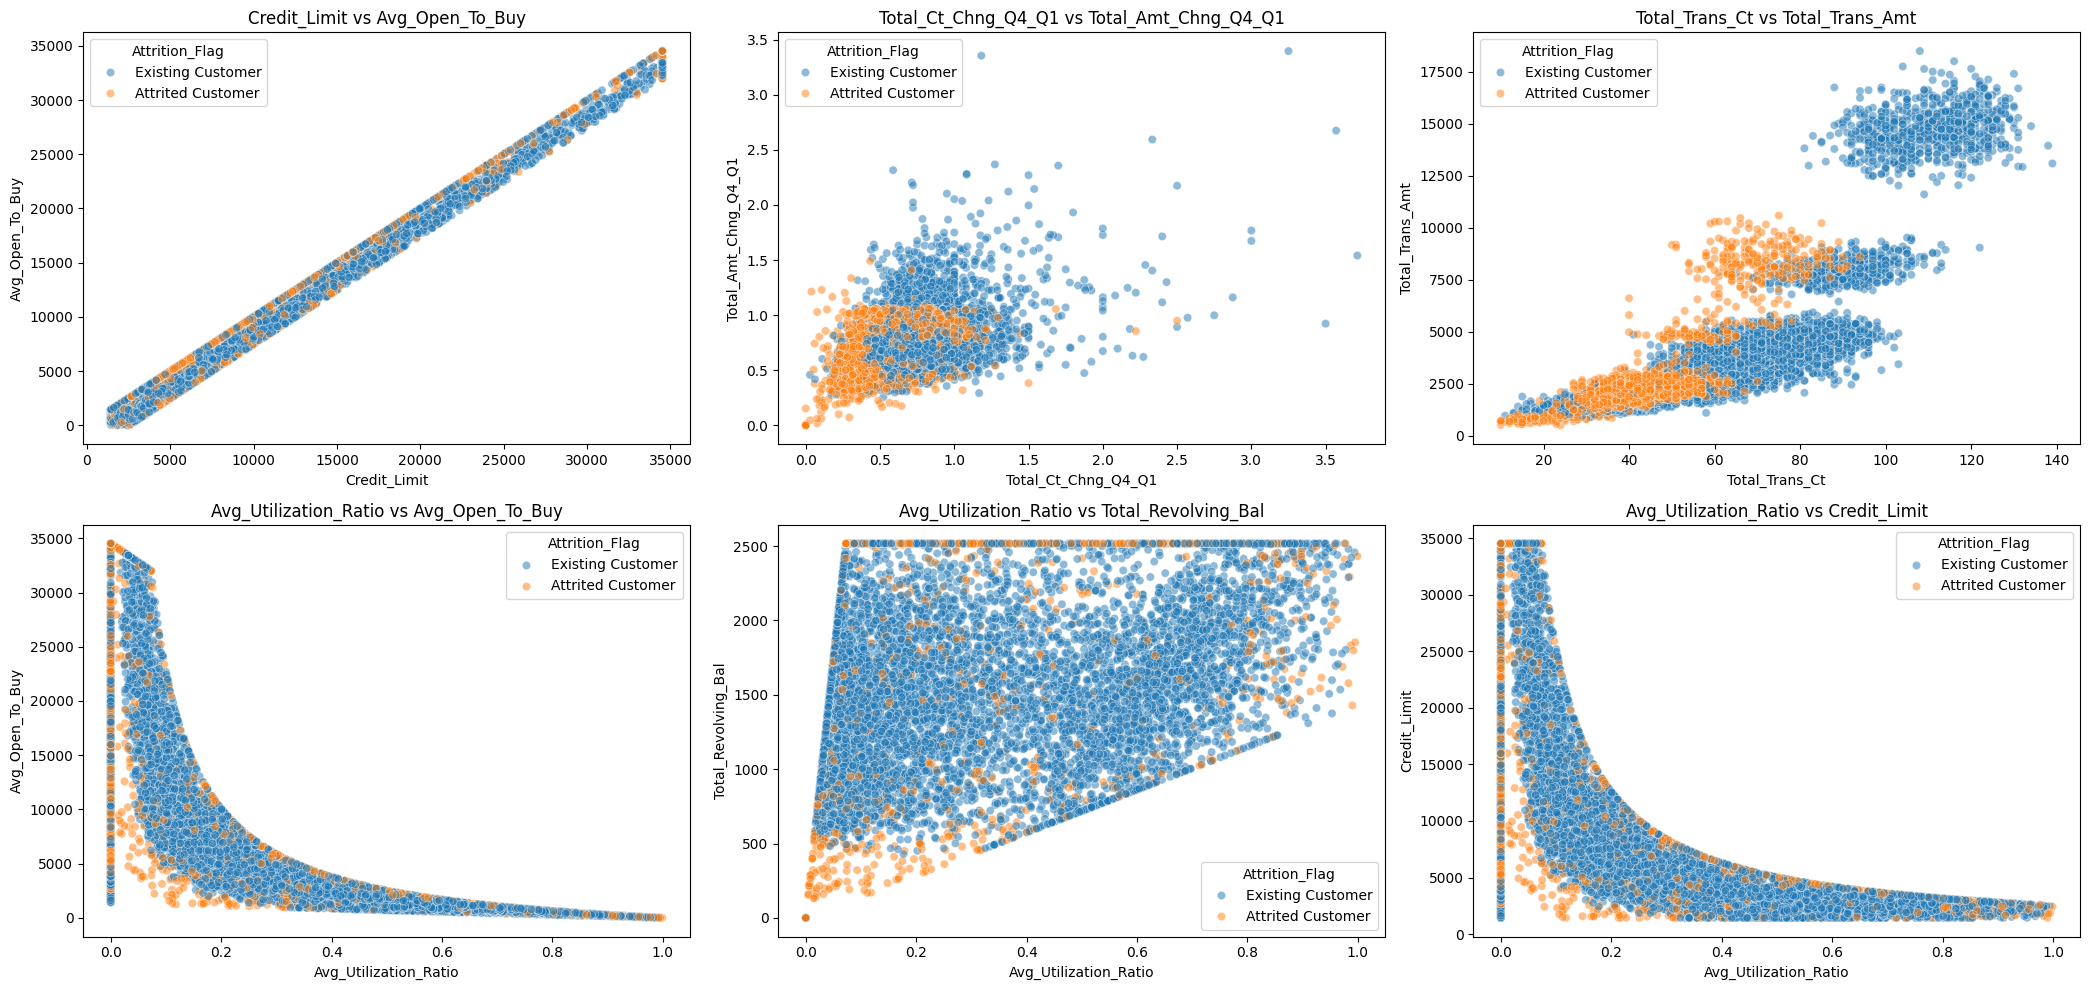

In [21]:
scatter = [['Credit_Limit','Avg_Open_To_Buy'],['Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1'],['Total_Trans_Ct','Total_Trans_Amt'],['Avg_Utilization_Ratio','Avg_Open_To_Buy'],['Avg_Utilization_Ratio','Total_Revolving_Bal'],['Avg_Utilization_Ratio','Credit_Limit']]

ncols = 3
nrows = math.ceil(len(scatter) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows))

axes = axes.flatten()

for i, (x, y) in enumerate(scatter):
    ax = axes[i]
    sns.scatterplot(data=df1, x=x, y=y, hue='Attrition_Flag', alpha=0.5, ax=ax)
    ax.set_title(f'{x} vs {y}')
    ax.legend(title='Attrition_Flag')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Mixed
* Total Transaction Amount, Total Transaction count have a bit moderate co-relation with Total Relationship Count

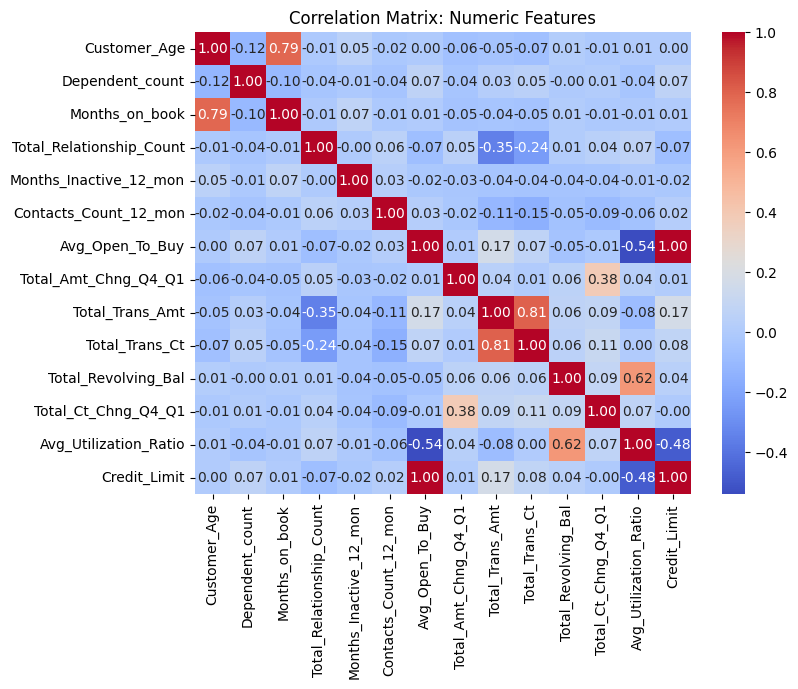

In [22]:
Numeric = Numeric_Discrete + Numeric_Continuous
corr_heatmap(df1,Numeric)

## Relation to target Analysis
* The probability of churn is higher among female customers compared to male customers.
* Customers with an unknown education level or income category exhibit the third highest probability of churn. People in lower and higher income churun more then the ones in middle income. People with doctorate have especially higher level of churn rate over those without.
* Attrition probability is highest among customers with an unknown marital status. Single, Divored people churn more than Married
* Customer attrition tends to rise with premium card segments, as clients in these tiers typically have higher expectations and are more likely to switch providers if their requirements are not fully satisfied. Blue card holder are more likely to churn over silver. But gold and platinum are more likely to churn over blue.
* People who have lower number of relationships with banks are more likely to churn. Having atleast 3 relatioships with bank drops churn probability by 1.5 times.
* Probability of churn increases with increases in number of contacts made to bank in last 12 months. If person has contacted bank 6 times in last 12 months then it alomost certain that person churns.
* Instresting that people who were not inactive even for a single month churned the most. Almost 90% of its customers were inactive atleast 2 months in last 12 months.
* Total Transaction Amount, Total Transaction Count,Total Transaction Change Ratio Q4 to Q1,Total Revolving Balance, Average Utilization Ratio are having a clear low values cluster of Attrited Customers. Thus are strong indicators of churn.
* Avg. open to buy, Credit Limit, Total Transaction Amount change Q4 to Q1 are not much co-related to churn.
* Total Revolving balance, Avg. Utilization Ratio of churners in near zero. That's a strong indicator of attrition.

### Categoricals

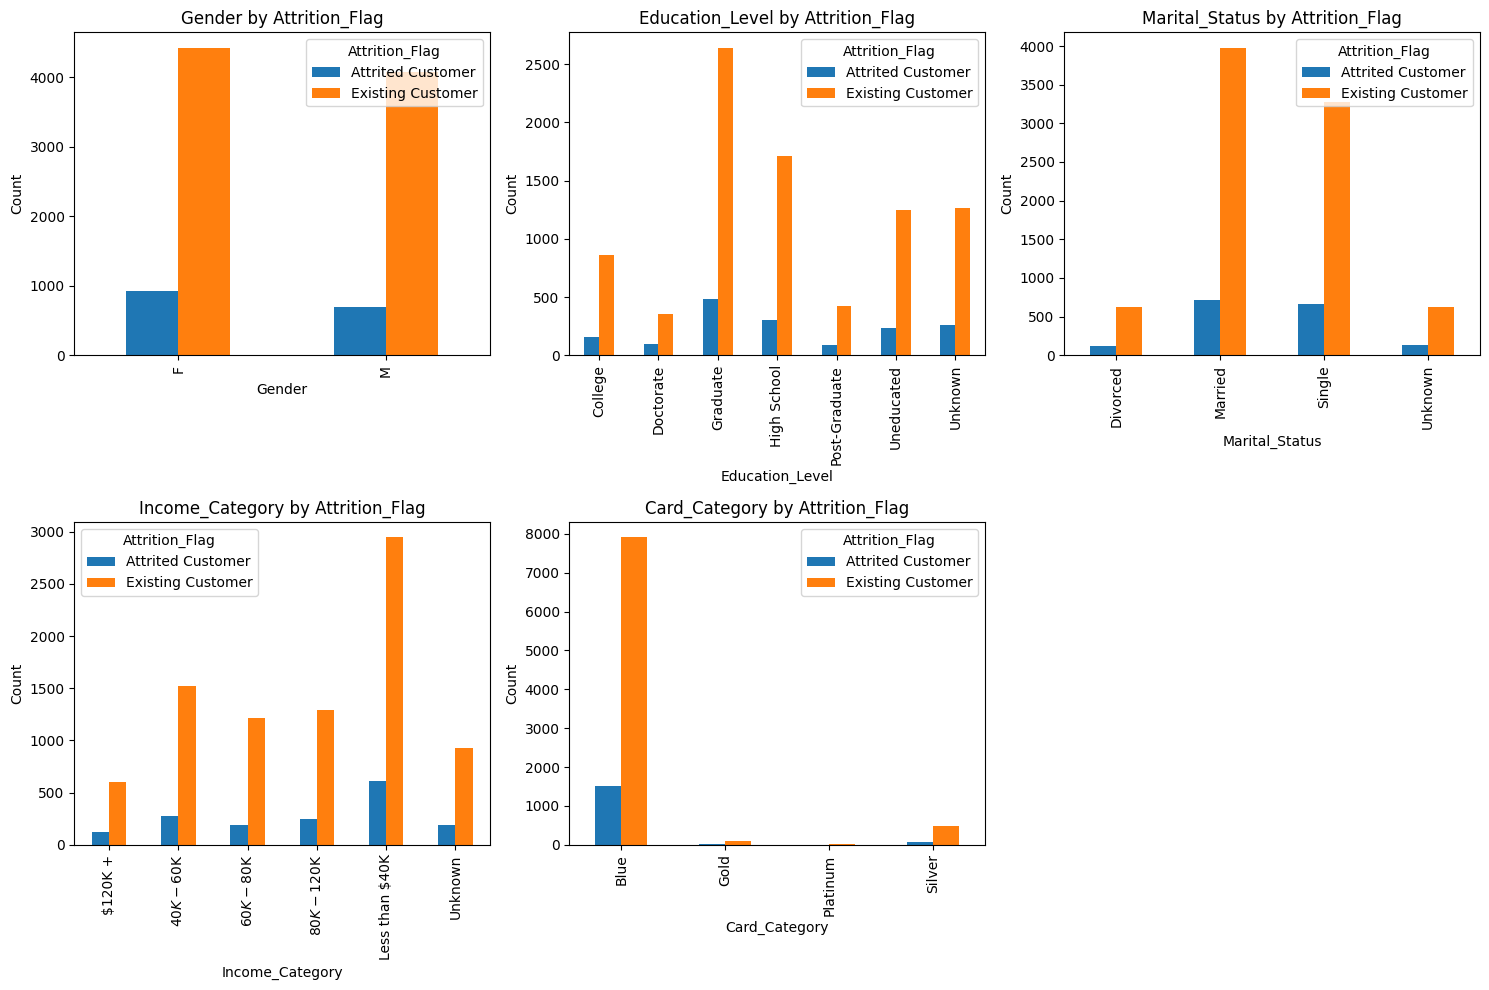

In [23]:
analysis_plots(df1,Categoricals,'Categorical',target_col=target)

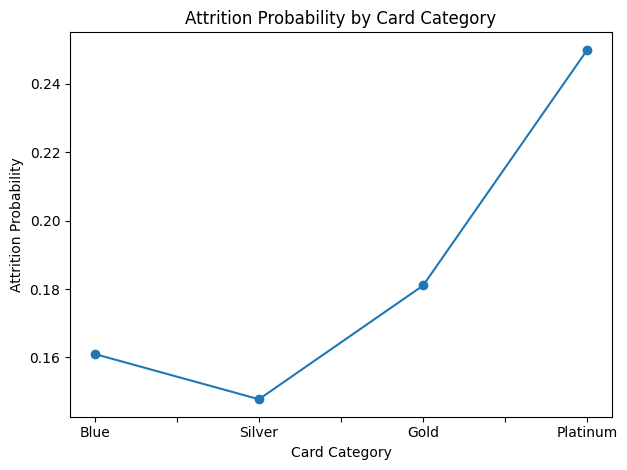

In [24]:
cards = pd.crosstab(index=df1['Card_Category'], columns=df1[target])
cards['Attrition Probability'] = cards['Attrited Customer'] / (cards['Attrited Customer'] + cards['Existing Customer'])
cards = cards.reindex(['Blue', 'Silver', 'Gold', 'Platinum'])
cards['Attrition Probability'].plot(marker='o')
plt.ylabel('Attrition Probability')
plt.xlabel('Card Category')
plt.title('Attrition Probability by Card Category')
plt.tight_layout()
plt.show()


In [25]:
gender = pd.crosstab(columns=df1['Gender'], index=df1[target]).T
gender['Attrition Probability'] = gender['Attrited Customer'] / (gender['Attrited Customer'] + gender['Existing Customer'])
gender

Attrition_Flag,Attrited Customer,Existing Customer,Attrition Probability
Gender,,,
F,930,4428,0.173572
M,697,4072,0.146152


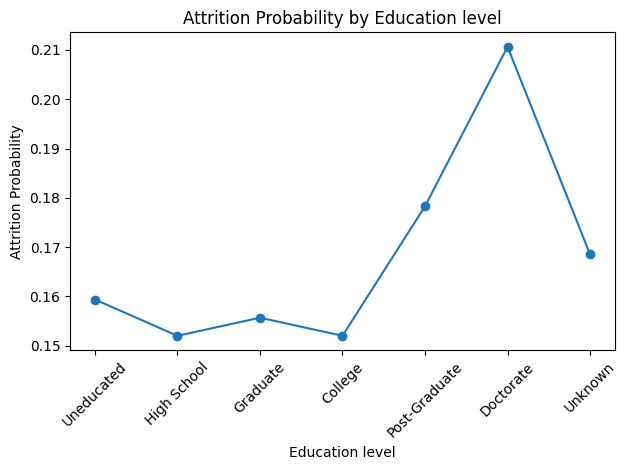

In [26]:
Education_level = pd.crosstab(columns=df1['Education_Level'], index=df1[target]).T
Education_level['Attrition Probability'] = Education_level['Attrited Customer'] / (Education_level['Attrited Customer'] + Education_level['Existing Customer'])
Education_level = Education_level.reindex(['Uneducated','High School','Graduate','College','Post-Graduate','Doctorate','Unknown'])
Education_level['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Education level')
plt.ylabel('Attrition Probability')
plt.xlabel('Education level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

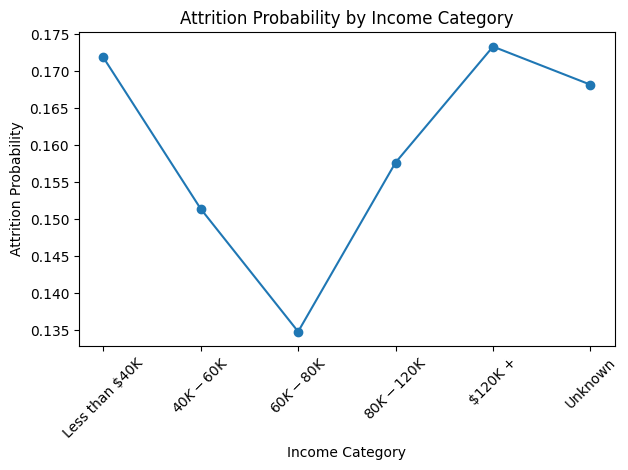

In [27]:
Income_Category = pd.crosstab(columns=df1['Income_Category'], index=df1[target]).T
Income_Category['Attrition Probability'] = Income_Category['Attrited Customer'] / (Income_Category['Attrited Customer'] + Income_Category['Existing Customer'])
Income_Category = Income_Category.reindex(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
Income_Category['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Income Category')
plt.ylabel('Attrition Probability')
plt.xlabel('Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

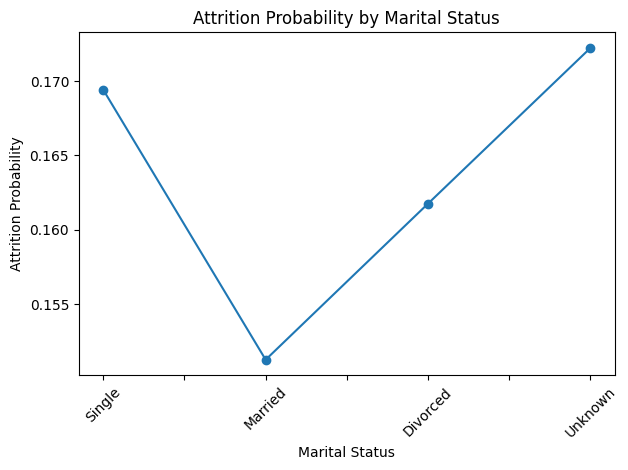

In [28]:
Marital_Status = pd.crosstab(columns=df1['Marital_Status'], index=df1[target]).T
Marital_Status['Attrition Probability'] = Marital_Status['Attrited Customer'] / (Marital_Status['Attrited Customer'] + Marital_Status['Existing Customer'])
Marital_Status = Marital_Status.reindex(['Single', 'Married', 'Divorced', 'Unknown'])
Marital_Status['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Marital Status')
plt.ylabel('Attrition Probability')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Numeric Discrete

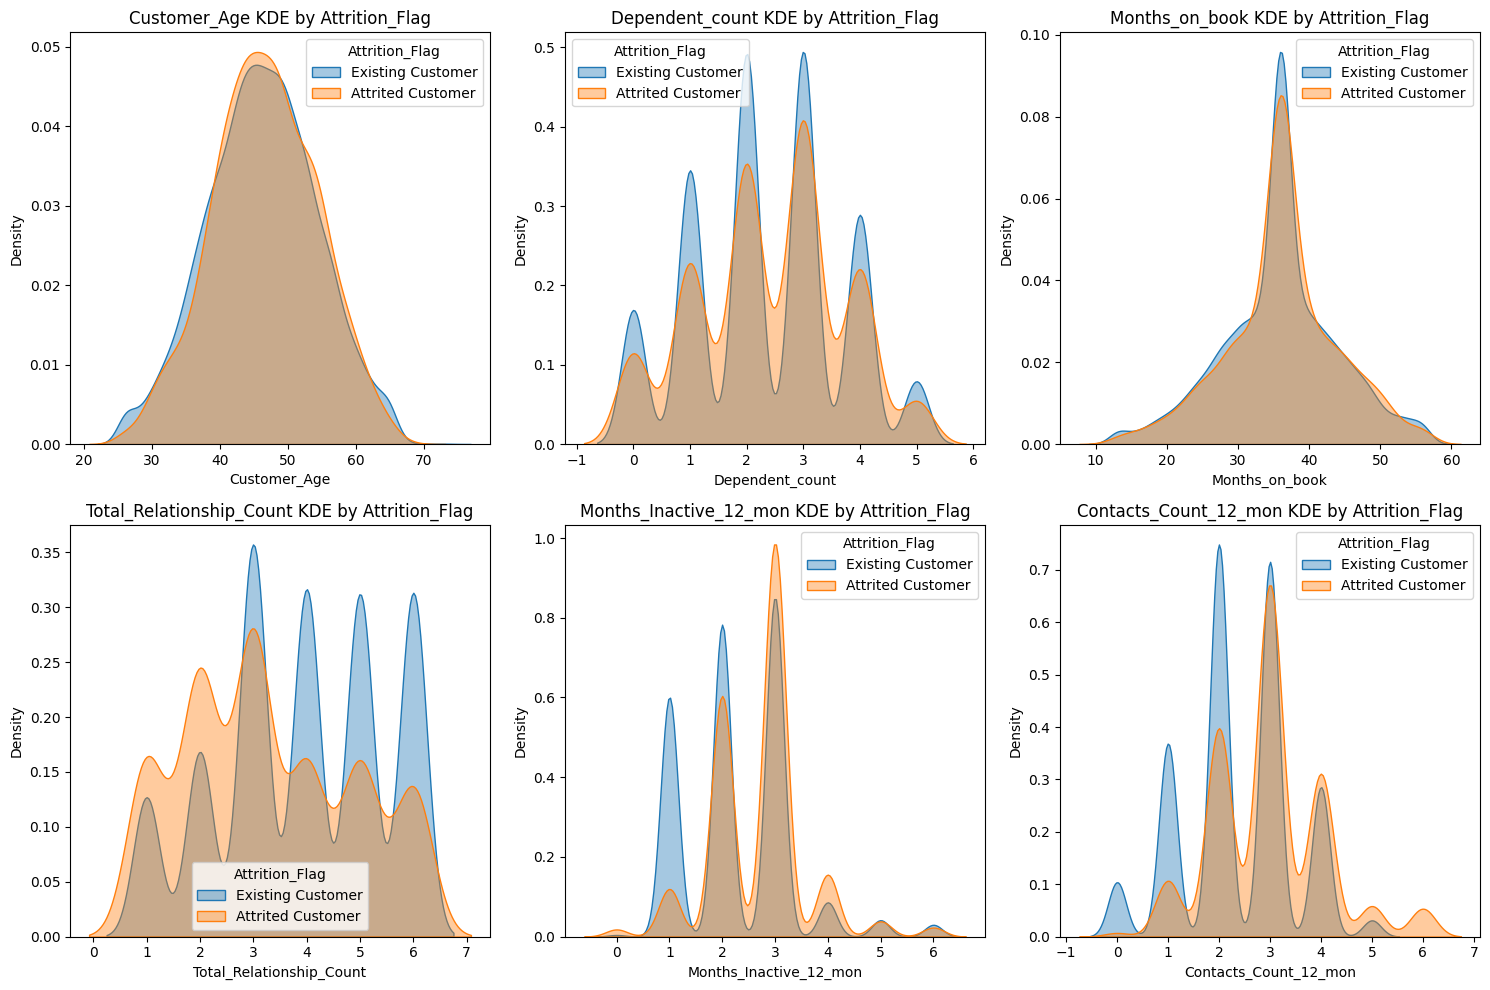

In [29]:
analysis_plots(df1,Numeric_Discrete,'Numeric_Discrete',target_col=target)

Text(0, 0.5, 'Attition Probability')

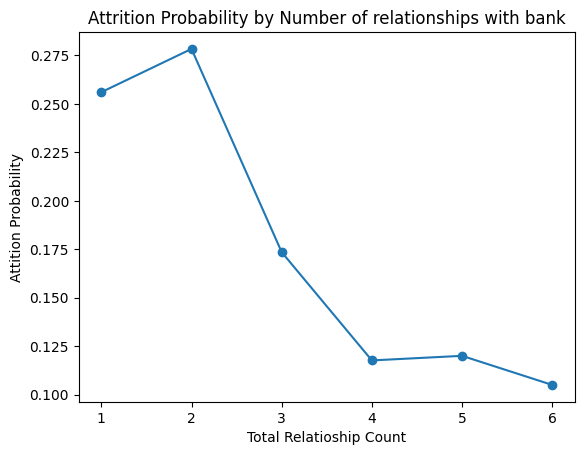

In [30]:
Total_Relationship_Count = pd.crosstab(index=df1['Total_Relationship_Count'], columns=df1['Attrition_Flag'])
Total_Relationship_Count['Attrition Probability'] = Total_Relationship_Count['Attrited Customer']/(Total_Relationship_Count['Existing Customer']+Total_Relationship_Count['Attrited Customer'])
Total_Relationship_Count['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Number of relationships with bank')
plt.xlabel('Total Relatioship Count')
plt.ylabel('Attition Probability')

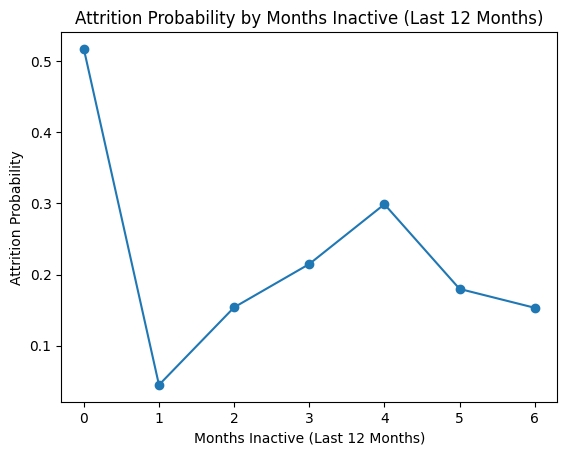

In [31]:
Months_Inactive_12_mon = pd.crosstab(index=df1['Months_Inactive_12_mon'], columns=df1['Attrition_Flag'])
Months_Inactive_12_mon['Attrition Probability'] = Months_Inactive_12_mon['Attrited Customer'] / (Months_Inactive_12_mon['Existing Customer'] + Months_Inactive_12_mon['Attrited Customer'])
Months_Inactive_12_mon['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Months Inactive (Last 12 Months)')
plt.xlabel('Months Inactive (Last 12 Months)')
plt.ylabel('Attrition Probability')
plt.show()

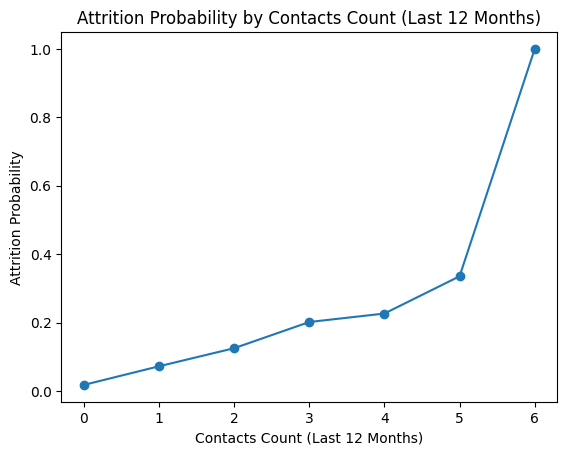

In [32]:
Contacts_Count_12_mon = pd.crosstab(index=df1['Contacts_Count_12_mon'], columns=df1['Attrition_Flag'])
Contacts_Count_12_mon['Attrition Probability'] = Contacts_Count_12_mon['Attrited Customer'] / (Contacts_Count_12_mon['Existing Customer'] + Contacts_Count_12_mon['Attrited Customer'])
Contacts_Count_12_mon['Attrition Probability'].plot(marker='o')
plt.title('Attrition Probability by Contacts Count (Last 12 Months)')
plt.xlabel('Contacts Count (Last 12 Months)')
plt.ylabel('Attrition Probability')
plt.show()

### Numeric Continuous

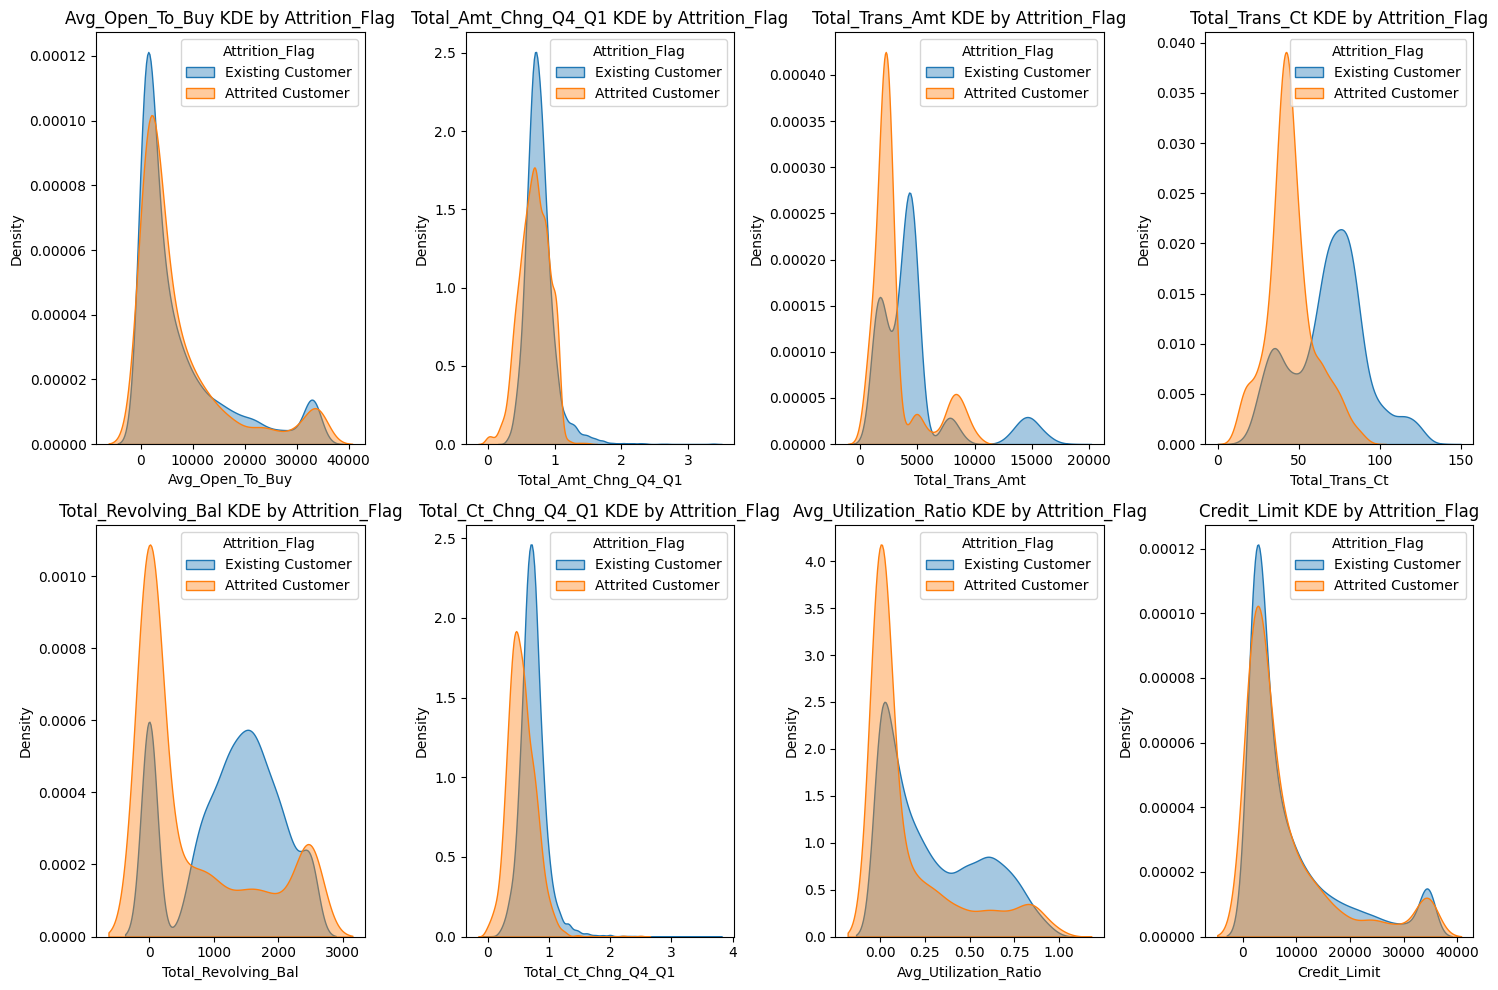

In [33]:
analysis_plots(df1,Numeric_Continuous,'Numeric_Continuous',target_col=target,ncols=4)

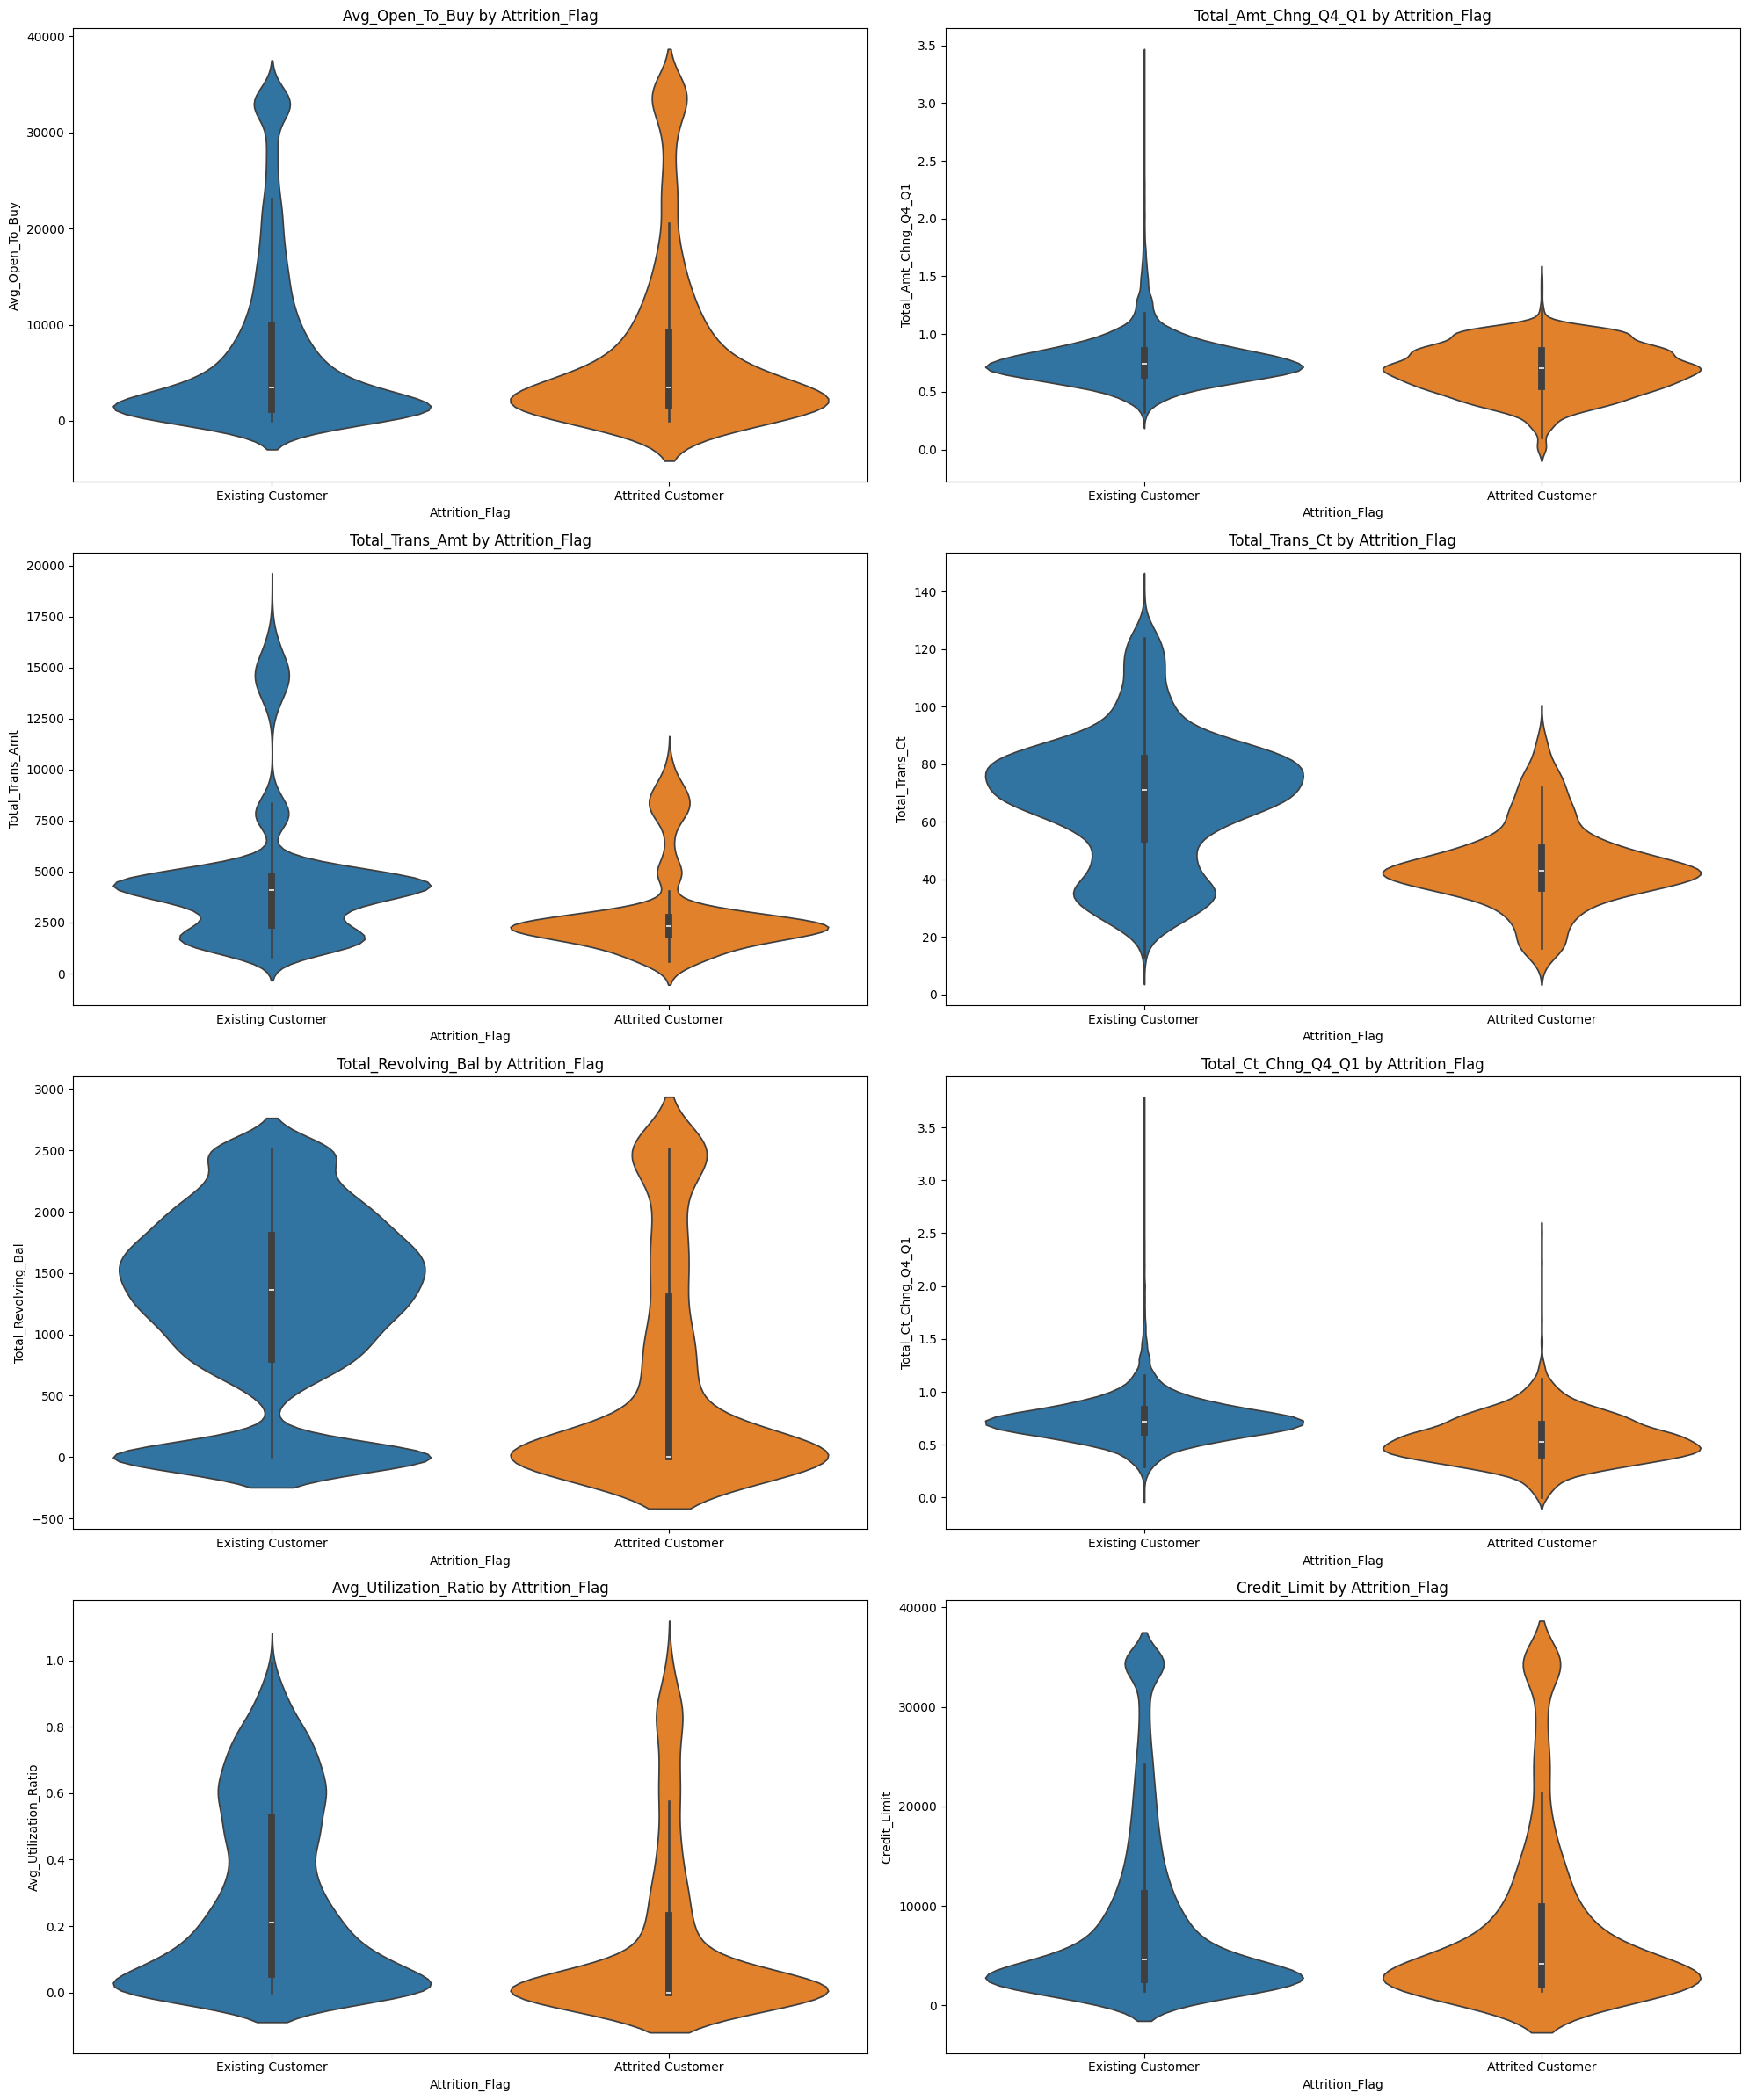

In [35]:
def violin():
    ncols = 2
    nrows = math.ceil(len(Numeric_Continuous) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10 * ncols, 6 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(Numeric_Continuous):
        sns.violinplot(
            data=df1,
            x=target,
            y=col,
            ax=axes[i],
            hue=target
        )
        axes[i].set_title(f'{col} by {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
violin()